In [1]:
!python -m pip install seaborn

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Read and Prepare Data

In [3]:
df = pd.read_csv("C:/Users\mekho\Documents\PycharmProjects\Quiz_Food_LinkedIn\data\Food\wrangled_food_data.csv")

C:\Users\mekho\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,16,27,28,29,30,37,38,39,43,44,45,99,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(230875, 178)

In [5]:
df.head()

,Unnamed: 0,DISPCODE,SEQNO,STATERE1,SAFETIME,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,...,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,MMSANAME,_MMSA
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(set(df.MMSANAME))

[nan,
 'Cambridge-Newton-Framingham, MA, Metropolitan Division                                              ',
 'Anchorage, AK, Metropolitan Statistical Area                                                        ',
 'Tallahassee, FL, Metropolitan Statistical Area                                                      ',
 'Jackson, MS, Metropolitan Statistical Area                                                          ',
 'Cleveland-Elyria, OH, Metropolitan Statistical Area                                                 ',
 'Orlando-Kissimmee-Sanford, FL, Metropolitan Statistical Area                                        ',
 'Pittsburgh, PA, Metropolitan Statistical Area                                                       ',
 'Rapid City, SD, Metropolitan Statistical Area                                                       ',
 'Sioux City, IA-NE-SD, Metropolitan Statistical Area                                                 ',
 'Augusta-Richmond County, GA-SC, Metropolitan St

In [7]:
df['city'] = df.MMSANAME

In [8]:
df = df.loc[df.city != 'nan', :].copy()

In [9]:
# names = [str(n).split(',')[:-1].strip() for n in df.MMSANAME]

# df['city'] = names

# df = df.loc[df.city != 'nan', :].copy()

In [10]:
df.head()

,Unnamed: 0,DISPCODE,SEQNO,STATERE1,SAFETIME,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,...,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,MMSANAME,_MMSA,city
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.columns

Index(['Unnamed: 0', 'DISPCODE', 'SEQNO', 'STATERE1', 'SAFETIME', 'HHADULT',
       'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       ...
       '_PASTAE1', '_RFSEAT2', '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3',
       '_MMSAWT', 'MMSANAME', '_MMSA', 'city'],
      dtype='object', length=179)

In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df.head()

,DISPCODE,SEQNO,STATERE1,SAFETIME,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,...,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,MMSANAME,_MMSA,city
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Select Features

In [14]:
list_selected_features = ['city', 'FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_',
                          'VEGEDA2_', '_FRUTSU1', '_VEGESU1', '_FRTLT1A', '_VEGLT1A', 
                          '_FRT16A', '_VEG23A'] #'FRUITE1', '_VEGETE1'

In [15]:
df = df.loc[:, list_selected_features].reindex()

In [16]:
df.head()

,city,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# columns_to_select = [c for c in df.columns if c.startswith('_')]
# columns_to_select = ['city'] + columns_to_select
# df = df.loc[:, columns_to_select]

In [18]:
# df.head()

In [19]:
df.set_index('city', inplace=True)

In [20]:
df.head()

,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A
city,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploration

In [21]:
dict_col_unique_counts = {}

In [22]:
for c in df.columns:
    print('')
    print(c)
    print(len(df[c].unique()))
    dict_col_unique_counts[c] = len(df[c].unique())
    


FTJUDA2_
88

FRUTDA2_
116

GRENDA1_
108

FRNCHDA_
83

POTADA1_
85

VEGEDA2_
110

_FRUTSU1
505

_VEGESU1
1358

_FRTLT1A
4

_VEGLT1A
4

_FRT16A
3

_VEG23A
3


In [23]:
dict_col_unique_counts

{'FTJUDA2_': 88,
 'FRUTDA2_': 116,
 'GRENDA1_': 108,
 'FRNCHDA_': 83,
 'POTADA1_': 85,
 'VEGEDA2_': 110,
 '_FRUTSU1': 505,
 '_VEGESU1': 1358,
 '_FRTLT1A': 4,
 '_VEGLT1A': 4,
 '_FRT16A': 3,
 '_VEG23A': 3}

In [24]:
df.FTJUDA2_.value_counts()

0000    89444
0100    31576
        17471
0014    13479
0029    12403
        ...  
1400        1
0110        1
1071        1
2800        1
1600        1
Name: FTJUDA2_, Length: 87, dtype: int64

In [25]:
# for i in df.FTJUDA2_:
#     try:
#         float(i)
#         print(i)
#     except:
#         print(i)

In [26]:
# sns.distplot(df['FTJUDA2_'].astype(float, error='coerce'))

## Data Transformation

### Fill Na

In [27]:
df = df.astype(str)

In [28]:
for col in df.columns:
    df[col] = df[col].str.strip()

In [29]:
np.where(df.applymap(lambda x: x == ''))

(array([   512,    512,    512, ..., 230859, 230859, 230859], dtype=int64),
 array([0, 1, 2, ..., 5, 6, 7], dtype=int64))

In [30]:
for col in df.columns:
    df[col] = df[col].replace("", "-1.0")
    df[col] = df[col].replace("nan", "-1.0")

In [31]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [32]:
df.head()

,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A
city,,,,,,,,,,,,
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [33]:
df = df.fillna("-1.0")

In [34]:
df = df.astype(float)

In [35]:
df.head()

,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A
city,,,,,,,,,,,,
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


[None]

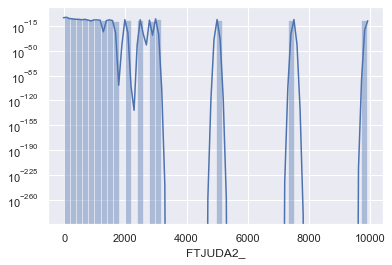

In [36]:
ax = sns.distplot(df['FTJUDA2_'])
ax.set(yscale="log")

In [37]:
# df = df.astype(str)

### Transformation

In [38]:
list_data_transformed = []

In [39]:
def transform_chunk(chunk):
    dict_temp_transformed_data = {}
#     print(np.unique(chunk.index)[0])
#     print(chunk.shape[0])
    dict_temp_transformed_data['city'] = np.unique(chunk.index)[0]
    for col in chunk.columns:
        print(col)
        if dict_col_unique_counts[col] < 30:
            print(col)
            for cat in list(np.unique(chunk[[col]])):
#                 print(np.unique(chunk[[col]]))
#                 print(cat)
                
                dict_temp_transformed_data[col + '_' + str(cat)] = sum((chunk[[col]].values == cat).squeeze()) / len(chunk)
#                 print(col + '_' + str(cat))
#                 print(dict_temp_transformed_data[col + '_' + str(cat)])
        else:
            dict_temp_transformed_data[col + '_mean'] = np.mean(chunk.loc[:, col].values)
            print(np.mean(chunk.loc[:, col].values))
            
    list_data_transformed.append(dict_temp_transformed_data)  
    return

In [40]:
sth = df.groupby('city').apply(lambda chunk: transform_chunk(chunk))

FTJUDA2_
32.278481012658226
FRUTDA2_
111.62183544303798
GRENDA1_
62.99208860759494
FRNCHDA_
15.875
POTADA1_
24.15348101265823
VEGEDA2_
84.20253164556962
_FRUTSU1
142.0237341772152
_VEGESU1
185.32911392405063
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
26.561668681983072
FRUTDA2_
103.12273276904475
GRENDA1_
56.084643288996375
FRNCHDA_
20.714631197097944
POTADA1_
18.01571946795647
VEGEDA2_
81.20677146311971
_FRUTSU1
128.9546553808948
_VEGESU1
173.50725513905684
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
34.01154734411085
FRUTDA2_
107.9284064665127
GRENDA1_
63.52309468822171
FRNCHDA_
15.021939953810623
POTADA1_
21.39838337182448
VEGEDA2_
89.72863741339492
_FRUTSU1
141.29907621247114
_VEGESU1
184.93995381062356
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
23.616132167152575
FRUTDA2_
107.8134110787172
GRENDA1_
58.06219630709427
FRNCHDA_
16.672497570456756
POTADA1_
21.011661807580175
VEGEDA2_
9

_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
27.77
FRUTDA2_
104.09333333333333
GRENDA1_
57.895833333333336
FRNCHDA_
17.843333333333334
POTADA1_
20.136666666666667
VEGEDA2_
87.90333333333334
_FRUTSU1
130.81166666666667
_VEGESU1
178.82166666666666
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
28.936967632027258
FRUTDA2_
95.96081771720613
GRENDA1_
51.29301533219761
FRNCHDA_
20.57580919931857
POTADA1_
21.156729131175467
VEGEDA2_
86.29301533219761
_FRUTSU1
123.66098807495742
_VEGESU1
176.34071550255535
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
39.97442799461642
FRUTDA2_
120.25033647375504
GRENDA1_
73.0592193808883
FRNCHDA_
25.61372812920592
POTADA1_
22.46298788694482
VEGEDA2_
108.7550471063257
_FRUTSU1
158.8021534320323
_VEGESU1
218.00538358008075
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
22.971990592259996
FRUTDA2_
111.31409022877914
GRENDA1_
56.60594398118452
FRNCHDA_
16.6576

FTJUDA2_
25.480946123521683
FRUTDA2_
113.19776609724047
GRENDA1_
48.318002628120894
FRNCHDA_
21.88042049934297
POTADA1_
23.865965834428383
VEGEDA2_
90.29566360052563
_FRUTSU1
137.61432325886992
_VEGESU1
181.8988173455979
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
42.85385878489327
FRUTDA2_
113.30870279146141
GRENDA1_
69.5911330049261
FRNCHDA_
25.04433497536946
POTADA1_
32.610837438423644
VEGEDA2_
139.50656814449917
_FRUTSU1
152.01149425287358
_VEGESU1
259.82676518883414
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
26.726020892687558
FRUTDA2_
108.38414055080722
GRENDA1_
59.464862298195634
FRNCHDA_
16.337132003798672
POTADA1_
13.898860398860398
VEGEDA2_
80.50664767331433
_FRUTSU1
133.87986704653372
_VEGESU1
166.80389363722696
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
33.17464232856438
FRUTDA2_
92.4163788850518
GRENDA1_
48.20226936359151
FRNCHDA_
21.485446472619635
POTADA1_
24.801677355698

_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
44.865309446254074
FRUTDA2_
125.21319218241042
GRENDA1_
78.6172638436482
FRNCHDA_
19.896905537459283
POTADA1_
31.850651465798045
VEGEDA2_
120.49169381107492
_FRUTSU1
167.52540716612378
_VEGESU1
244.70325732899022
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
26.088022284122562
FRUTDA2_
124.11476323119777
GRENDA1_
56.90139275766017
FRNCHDA_
20.82618384401114
POTADA1_
20.716434540389972
VEGEDA2_
92.30417827298051
_FRUTSU1
148.65682451253483
_VEGESU1
185.93927576601672
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
29.06741573033708
FRUTDA2_
103.19101123595506
GRENDA1_
49.80149812734082
FRNCHDA_
19.884831460674157
POTADA1_
28.865168539325843
VEGEDA2_
85.3249063670412
_FRUTSU1
130.7181647940075
_VEGESU1
179.9185393258427
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
28.306528662420384
FRUTDA2_
117.11385350318471
GRENDA1_
66.28343949044586
FRNCHDA_
18.33439490

_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
29.114083398898504
FRUTDA2_
114.6089693154996
GRENDA1_
54.72029897718332
FRNCHDA_
16.953186467348544
POTADA1_
21.950432730133752
VEGEDA2_
86.4390243902439
_FRUTSU1
142.13886703383162
_VEGESU1
176.72462627852084
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
38.464177007726526
FRUTDA2_
127.47260594708499
GRENDA1_
73.96569889955514
FRNCHDA_
20.658276750175602
POTADA1_
22.395808944041207
VEGEDA2_
137.43771950362913
_FRUTSU1
163.08241629594943
_VEGESU1
235.94287052212596
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
28.00581395348837
FRUTDA2_
86.89728682170542
GRENDA1_
46.424418604651166
FRNCHDA_
18.102713178294575
POTADA1_
21.598837209302324
VEGEDA2_
77.08527131782945
_FRUTSU1
113.74031007751938
_VEGESU1
157.4108527131783
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
25.80784410458806
FRUTDA2_
100.91243216576221
GRENDA1_
49.43043907252097
FRNCHDA_
22.5653675

In [41]:
df_transformed = pd.DataFrame(list_data_transformed)

In [42]:
df_transformed.head()

,city,FTJUDA2__mean,FRUTDA2__mean,GRENDA1__mean,FRNCHDA__mean,POTADA1__mean,VEGEDA2__mean,_FRUTSU1_mean,_VEGESU1_mean,_FRTLT1A_1.0,_FRTLT1A_2.0,_FRTLT1A_9.0,_VEGLT1A_1.0,_VEGLT1A_2.0,_VEGLT1A_9.0,_FRT16A_1.0,_VEG23A_0.0,_VEG23A_1.0,_FRT16A_0.0
0,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",32.278481,111.621835,62.992089,15.875000,24.153481,84.202532,142.023734,185.329114,0.639241,0.276899,0.083861,0.759494,0.142405,0.098101,1.000000,0.001582,0.998418,NaN
1,"Albuquerque, NM, Metropolitan Statistical Area...",26.561669,103.122733,56.084643,20.714631,18.015719,81.206771,128.954655,173.507255,0.588875,0.338573,0.072551,0.755139,0.158404,0.086457,1.000000,NaN,1.000000,NaN
2,"Allentown-Bethlehem-Easton, PA-NJ, Metropolita...",34.011547,107.928406,63.523095,15.021940,21.398383,89.728637,141.299076,184.939954,0.654734,0.281755,0.063510,0.795612,0.124711,0.079677,1.000000,NaN,1.000000,NaN
3,"Anchorage, AK, Metropolitan Statistical Area ...",23.616132,107.813411,58.062196,16.672498,21.011662,91.934888,130.093294,184.853256,0.592809,0.333333,0.073858,0.774538,0.133139,0.092323,1.000000,NaN,1.000000,NaN
4,"Atlanta-Sandy Springs-Roswell, GA, Metropolita...",31.384171,103.698370,58.061141,18.852921,21.700747,89.085598,133.278872,180.922215,0.583560,0.317255,0.099185,0.727242,0.142663,0.130095,0.999321,0.001359,0.998641,0.000679


In [43]:
df_transformed.shape

(135, 19)

In [44]:
df_transformed.columns

Index(['city', 'FTJUDA2__mean', 'FRUTDA2__mean', 'GRENDA1__mean',
       'FRNCHDA__mean', 'POTADA1__mean', 'VEGEDA2__mean', '_FRUTSU1_mean',
       '_VEGESU1_mean', '_FRTLT1A_1.0', '_FRTLT1A_2.0', '_FRTLT1A_9.0',
       '_VEGLT1A_1.0', '_VEGLT1A_2.0', '_VEGLT1A_9.0', '_FRT16A_1.0',
       '_VEG23A_0.0', '_VEG23A_1.0', '_FRT16A_0.0'],
      dtype='object')

### Fill Na of df_transformed

In [45]:
df_transformed = df_transformed.fillna(df_transformed.median())

In [46]:
df_transformed.head()

,city,FTJUDA2__mean,FRUTDA2__mean,GRENDA1__mean,FRNCHDA__mean,POTADA1__mean,VEGEDA2__mean,_FRUTSU1_mean,_VEGESU1_mean,_FRTLT1A_1.0,_FRTLT1A_2.0,_FRTLT1A_9.0,_VEGLT1A_1.0,_VEGLT1A_2.0,_VEGLT1A_9.0,_FRT16A_1.0,_VEG23A_0.0,_VEG23A_1.0,_FRT16A_0.0
0,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",32.278481,111.621835,62.992089,15.875000,24.153481,84.202532,142.023734,185.329114,0.639241,0.276899,0.083861,0.759494,0.142405,0.098101,1.000000,0.001582,0.998418,0.001227
1,"Albuquerque, NM, Metropolitan Statistical Area...",26.561669,103.122733,56.084643,20.714631,18.015719,81.206771,128.954655,173.507255,0.588875,0.338573,0.072551,0.755139,0.158404,0.086457,1.000000,0.001623,1.000000,0.001227
2,"Allentown-Bethlehem-Easton, PA-NJ, Metropolita...",34.011547,107.928406,63.523095,15.021940,21.398383,89.728637,141.299076,184.939954,0.654734,0.281755,0.063510,0.795612,0.124711,0.079677,1.000000,0.001623,1.000000,0.001227
3,"Anchorage, AK, Metropolitan Statistical Area ...",23.616132,107.813411,58.062196,16.672498,21.011662,91.934888,130.093294,184.853256,0.592809,0.333333,0.073858,0.774538,0.133139,0.092323,1.000000,0.001623,1.000000,0.001227
4,"Atlanta-Sandy Springs-Roswell, GA, Metropolita...",31.384171,103.698370,58.061141,18.852921,21.700747,89.085598,133.278872,180.922215,0.583560,0.317255,0.099185,0.727242,0.142663,0.130095,0.999321,0.001359,0.998641,0.000679


In [47]:
df_transformed = df_transformed.set_index('city')

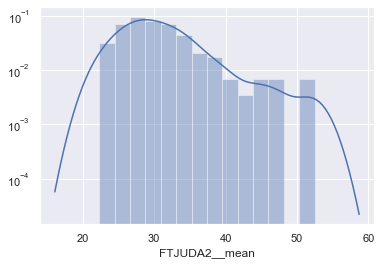

In [48]:
ax = sns.distplot(df_transformed['FTJUDA2__mean']);
ax.set(yscale="log");

C:\Users\mekho\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


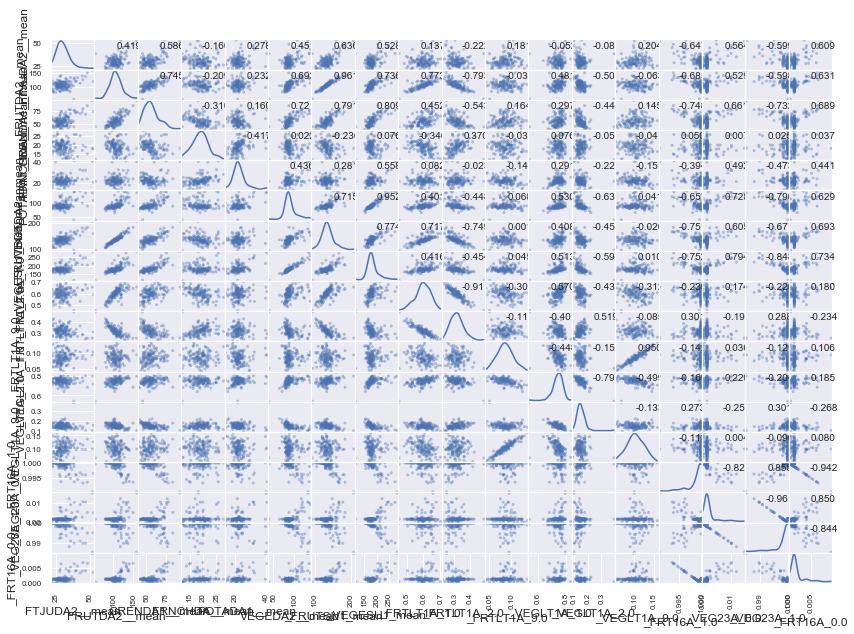

In [49]:
axes = pd.plotting.scatter_matrix(df_transformed, alpha = 0.4, figsize = (14,10), diagonal = 'kde');
corr = df_transformed.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center');

## Normalize Data

### Normalize via Box-Cox

In [50]:
df_transformed_normed = df_transformed.copy()

In [51]:
for col in df_transformed_normed.columns:
    df_transformed_normed[col] = list(stats.boxcox(df_transformed_normed[[col]])[0].squeeze())

In [52]:
df_transformed_normed.head()

,FTJUDA2__mean,FRUTDA2__mean,GRENDA1__mean,FRNCHDA__mean,POTADA1__mean,VEGEDA2__mean,_FRUTSU1_mean,_VEGESU1_mean,_FRTLT1A_1.0,_FRTLT1A_2.0,_FRTLT1A_9.0,_VEGLT1A_1.0,_VEGLT1A_2.0,_VEGLT1A_9.0,_FRT16A_1.0,_VEG23A_0.0,_VEG23A_1.0,_FRT16A_0.0
city,,,,,,,,,,,,,,,,,,
"Albany-Schenectady-Troy, NY, Metropolitan Statistical Area",0.626711,26.326839,0.813501,9.351119,1.278141,5.645442,1.543298,0.904858,-0.251530,-1.913255,-1.180344,-0.131628,-5.291926,-0.941326,0.00000,-8.635549,-0.001057,-8.579609
"Albuquerque, NM, Metropolitan Statistical Area",0.625797,25.032753,0.812710,11.725613,1.242851,5.587854,1.538638,0.904641,-0.271677,-1.511324,-1.204866,-0.132647,-4.708194,-0.954649,0.00000,-8.590794,0.000000,-8.579609
"Allentown-Bethlehem-Easton, PA-NJ, Metropolitan Statistical Area",0.626911,25.769527,0.813554,8.915226,1.264432,5.747020,1.543058,0.904851,-0.244696,-1.876606,-1.225316,-0.121915,-6.101865,-0.962452,0.00000,-8.590794,0.000000,-8.579609
"Anchorage, AK, Metropolitan Statistical Area",0.625092,25.752053,0.812958,9.753450,1.262265,5.786016,1.539074,0.904849,-0.270215,-1.540837,-1.201976,-0.127867,-5.690615,-0.947926,0.00000,-8.590794,0.000000,-8.579609
"Atlanta-Sandy Springs-Roswell, GA, Metropolitan Statistical Area",0.626596,25.121724,0.812958,10.830257,1.266080,5.735492,1.540262,0.904780,-0.273625,-1.636178,-1.148662,-0.138484,-5.281530,-0.905151,-0.00053,-8.903497,-0.000957,-9.550299


In [53]:
df_transformed_normed.shape

(135, 18)

C:\Users\mekho\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


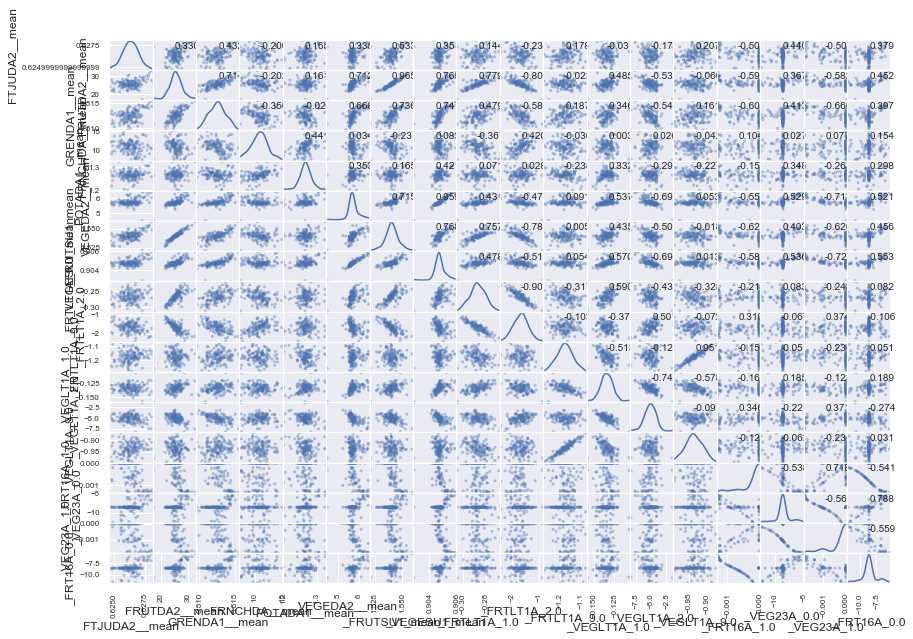

In [54]:
axes = pd.plotting.scatter_matrix(df_transformed_normed, alpha = 0.4, figsize = (14,10), diagonal = 'kde');
corr = df_transformed_normed.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center');

### Push Outliers

In [55]:
df_transformed_normed_pushed = df_transformed_normed.copy()

In [56]:
outliers  = []

for feature in df_transformed_normed.columns:
    
    Q1 = np.percentile(df_transformed_normed[feature], 25)
    
    Q3 = np.percentile(df_transformed_normed[feature], 75)
    
    step = 1.5*(Q3 - Q1)
    
    outliers_indices = df_transformed_normed.index[~((df_transformed_normed[feature] >= Q1 - step) 
                                                     & (df_transformed_normed[feature] <= Q3 + step))]
    
    if len(outliers_indices) > 0:

        good_indices = list(set(df_transformed_normed_pushed.index) - set(outliers_indices))

        df_transformed_normed_pushed.loc[outliers_indices, feature] = np.nanmedian(df_transformed_normed.loc[:, feature])


### Z-Score

In [57]:
from sklearn import preprocessing

In [58]:
df_transformed_normed_pushed_zscore = pd.DataFrame(preprocessing.scale(df_transformed_normed_pushed))

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [59]:
df_transformed_normed_pushed_zscore.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.530601,0.388755,0.816814,-1.008762,0.747415,-0.541787,0.573781,0.478367,0.944668,-1.000525,-0.096174,0.404113,-0.233092,-0.237949,0.792311,0.0,-0.896428,0.0
1,-0.818481,-0.297872,0.138771,0.615044,-1.784575,-0.966816,-0.503301,-0.459921,-0.263255,0.651729,-0.721648,0.240227,0.466186,-0.772839,0.792311,0.0,0.739601,0.0
2,0.826895,0.093051,0.862192,-1.306849,-0.236196,0.207911,0.518301,0.449485,1.354431,-0.849870,-1.243250,1.967391,-1.203351,-1.086154,0.792311,0.0,0.739601,0.0
3,-1.858565,0.083780,0.351227,-0.733627,-0.391644,0.495723,-0.402536,0.443033,-0.175559,0.530407,-0.647939,1.009466,-0.710697,-0.502920,0.792311,0.0,0.739601,0.0
4,0.360955,-0.250666,0.351118,0.002752,-0.117940,0.122832,-0.128047,0.143656,-0.380041,0.138482,0.711926,-0.699153,-0.220638,1.214441,-0.331612,0.0,-0.742107,0.0


In [60]:
df_transformed_normed_zscore = pd.DataFrame(preprocessing.scale(df_transformed_normed))

## PCA

In [61]:
pca = PCA(n_components=6)

In [62]:
pca.fit(df_transformed_normed_pushed_zscore)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [63]:
pca_transformed_normed = pca.transform(df_transformed_normed_zscore)

In [64]:
df_pca_transformed_normed = pd.DataFrame(pca_transformed_normed)

In [65]:
df_pca_transformed_normed

,0,1,2,3,4,5
0,1.416728,0.243176,0.923559,0.382749,-0.255737,0.722269
1,-1.486983,1.064396,0.621745,-0.567975,0.771390,-0.179764
2,1.681232,2.057730,1.516472,-0.785357,0.794647,1.376746
3,-0.367886,1.439484,0.653377,-1.782517,0.008385,-0.338312
4,0.040349,-1.756203,-0.439364,0.015171,-0.062261,0.137374
...,...,...,...,...,...,...
130,4.417700,-1.135000,-1.151238,-0.524749,-0.173783,-1.032606
131,-3.964289,-0.908642,-0.229201,-0.146201,0.409193,0.107117
132,-1.804781,-0.874419,-0.933993,-0.399043,-1.576195,0.067091
133,0.094423,-1.575193,0.369420,0.140356,0.252272,0.020916


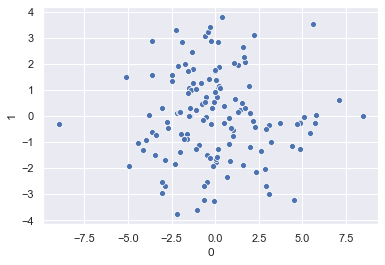

In [66]:
sns.scatterplot(x=0, y=1, data=df_pca_transformed_normed)

## Clustering

In [67]:
def Do_Clustering_KMeans(components=2, data=df_pca_transformed_normed):
    ##
    clusterer = KMeans(n_clusters=components, random_state=0).fit(data)

    preds = clusterer.predict(data)

    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    
    return score, preds, centers




### Finding Best Number of Clusters

In [68]:
number_of_components = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for n_components in number_of_components:
    score, _, _ = Do_Clustering_KMeans(components=n_components)
    print('With {} clusters, the silhouette coefficient is {:.3f}.'.format(n_components, score))

With 2 clusters, the silhouette coefficient is 0.281.
With 3 clusters, the silhouette coefficient is 0.240.
With 4 clusters, the silhouette coefficient is 0.218.
With 5 clusters, the silhouette coefficient is 0.212.
With 6 clusters, the silhouette coefficient is 0.217.
With 7 clusters, the silhouette coefficient is 0.221.
With 8 clusters, the silhouette coefficient is 0.199.
With 9 clusters, the silhouette coefficient is 0.197.
With 10 clusters, the silhouette coefficient is 0.186.
With 11 clusters, the silhouette coefficient is 0.179.
With 12 clusters, the silhouette coefficient is 0.172.
With 13 clusters, the silhouette coefficient is 0.189.
With 14 clusters, the silhouette coefficient is 0.187.


### Clusters

In [69]:
def cluster_results(reduced_data, preds, centers, first_axis=0, second_axis=1, 
                    pca_samples=None, axis_min=-8, axis_max=8):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (9,9))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = first_axis, y = second_axis, 
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    if pca_samples is not None:
        ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
                   s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA Data - Centroids Marked by Number");
    plt.axis([axis_min, axis_max, axis_min, axis_max])

In [70]:
_, preds, centers = Do_Clustering_KMeans(components=2)

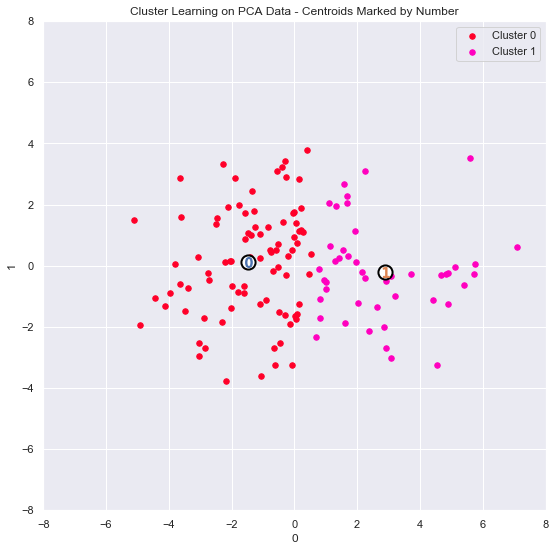

In [71]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=1)

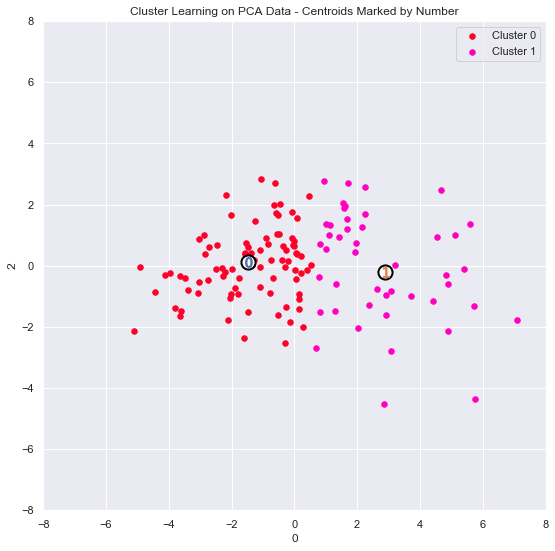

In [72]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=2)

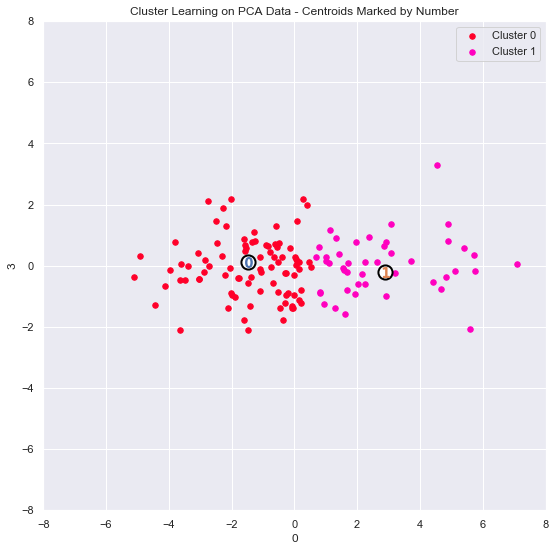

In [73]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=3)

In [74]:
df_transformed_normed.index[np.argmax(df_pca_transformed_normed[0])]

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


'Rockingham County-Strafford County, NH, Metropolitan Division                                       '

In [75]:
df_transformed_normed.index[np.argmin(df_pca_transformed_normed[0])]

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


'San Juan-Carolina-Caguas, PR, Metropolitan Statistical Area                                         '

## Principal Component Importance

In [76]:
dict_comp_feat = {}
for i, comp_original in enumerate(pca.components_):
    comp = np.abs(comp_original)
#     print(comp)
    out_arr = np.argsort(comp)
    out_arr = np.flip(out_arr)
    out_arr_first_ten = out_arr[0:20]
    dict_temp = {}
    dict_temp['importances'] = comp_original[out_arr_first_ten]
    dict_temp['features'] = df_transformed_normed.columns[out_arr_first_ten]
    dict_comp_feat[i] = dict_temp
    

In [77]:
def pca_importance(comp=None, dict_comp_feat=None, pca=None):

    ratios = pca.explained_variance_ratio_ #.reshape(len(pca.components_), 1)

    plt.figure(figsize=(14,8));
    
    components = dict_comp_feat[comp]
    components = pd.DataFrame(components)

    # Plot the feature weights as a function of the components
    explained_variance_ratio = pca.explained_variance_ratio_[comp]
    g = sns.barplot(x="features", y="importances", data=components)
    g.set_title("component {}, explained_variance_ratio is {:.2f}".format(comp, explained_variance_ratio))
    
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

    return

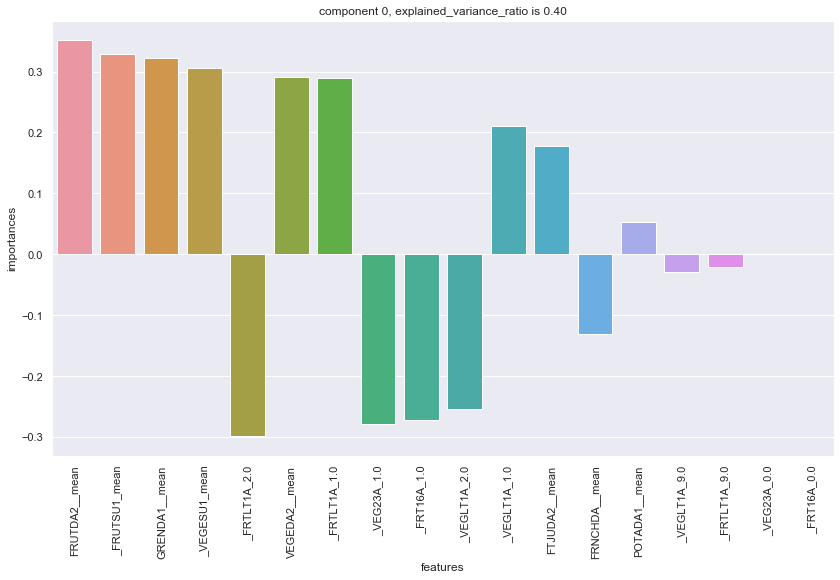

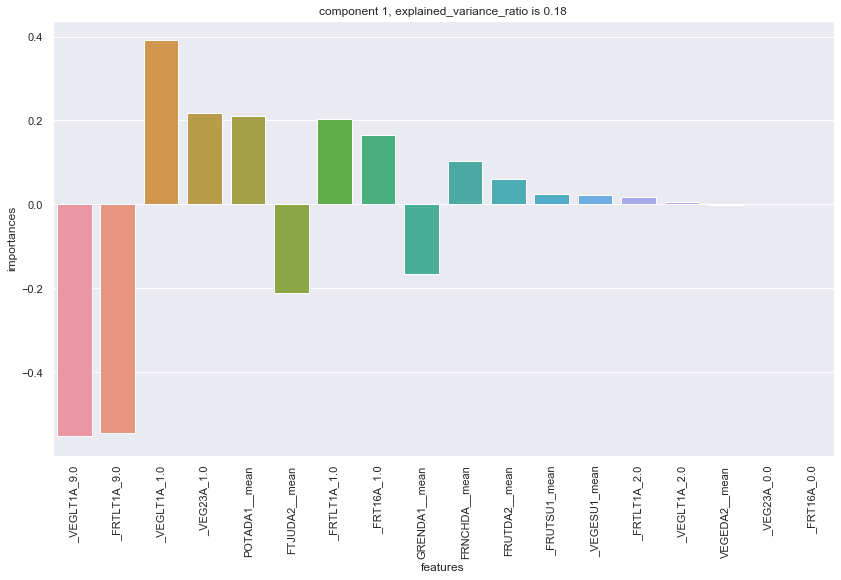

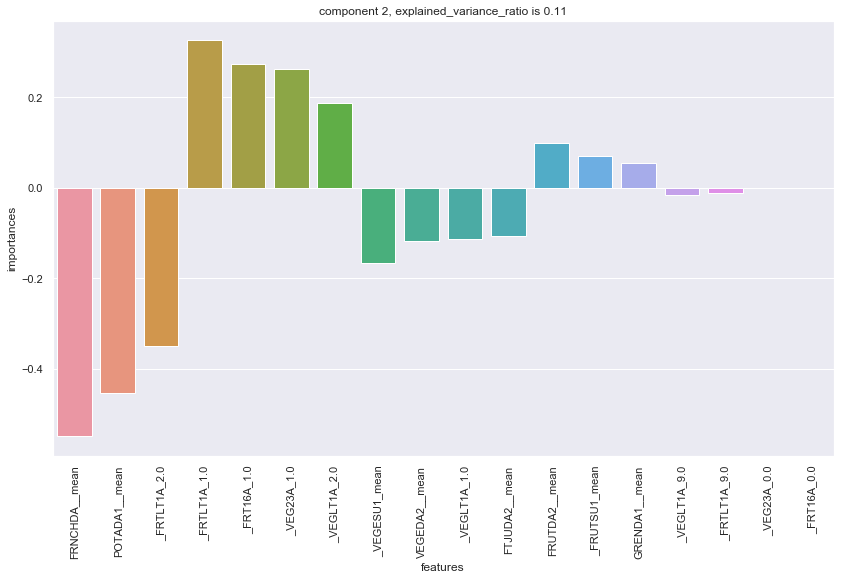

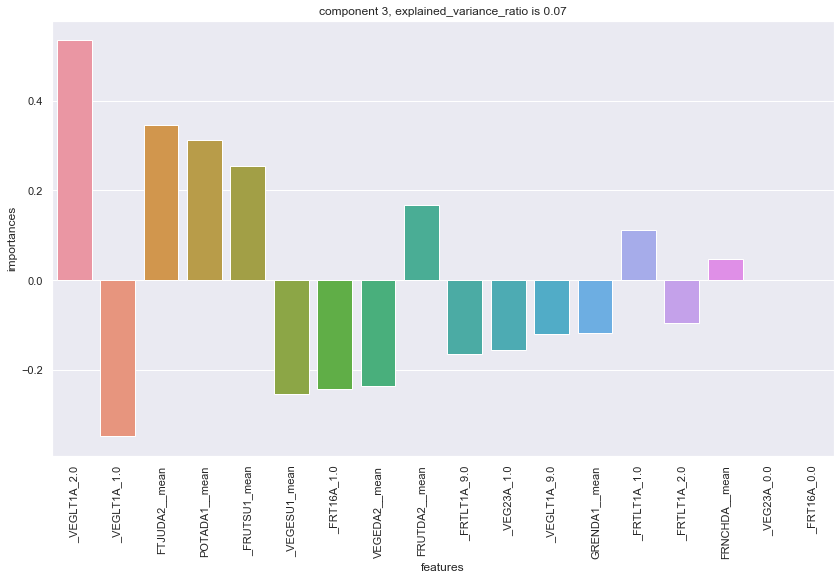

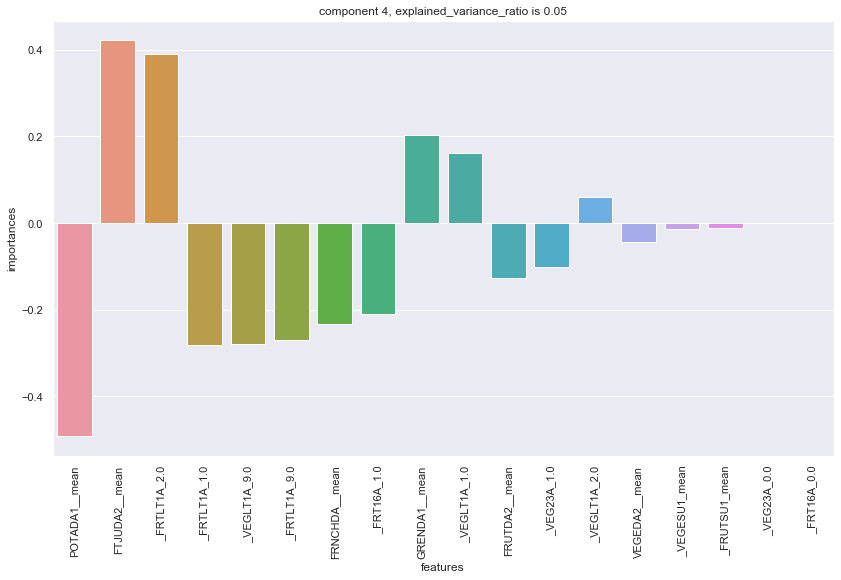

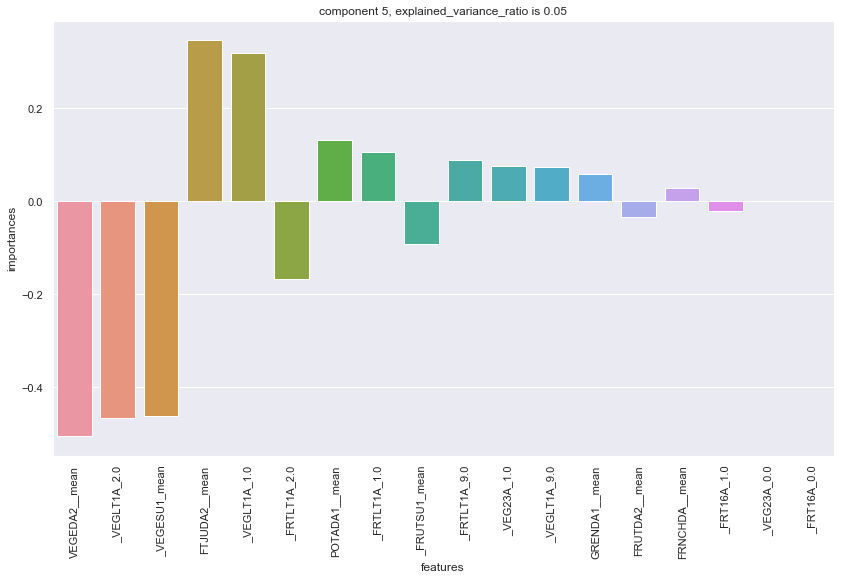

In [78]:
for comp in range(len(pca.components_)):
    pca_importance(comp=comp, dict_comp_feat=dict_comp_feat, pca=pca)

## Save PCA Results

### Add Metro to PCA Data

In [79]:
df_pca_transformed_normed['city'] = df_transformed.index

In [80]:
df_pca_transformed_normed.head()

,0,1,2,3,4,5,city
0,1.416728,0.243176,0.923559,0.382749,-0.255737,0.722269,"Albany-Schenectady-Troy, NY, Metropolitan Stat..."
1,-1.486983,1.064396,0.621745,-0.567975,0.771390,-0.179764,"Albuquerque, NM, Metropolitan Statistical Area..."
2,1.681232,2.057730,1.516472,-0.785357,0.794647,1.376746,"Allentown-Bethlehem-Easton, PA-NJ, Metropolita..."
3,-0.367886,1.439484,0.653377,-1.782517,0.008385,-0.338312,"Anchorage, AK, Metropolitan Statistical Area ..."
4,0.040349,-1.756203,-0.439364,0.015171,-0.062261,0.137374,"Atlanta-Sandy Springs-Roswell, GA, Metropolita..."


### Save DF

In [81]:
df_pca_transformed_normed.to_csv("C:/Users\mekho\Documents\PycharmProjects\Quiz_Food_LinkedIn\data\Food\pca_food_data.csv")